### Combine all years and countries together to get the sum of each migrant group in a final dataframe

In [1]:
import numpy as np
import pandas as pd
import rasterio 
import matplotlib.pyplot as plt
%matplotlib inline
import mapclassify as mc

city='cph'
ancillary_POPdata_folder_path = "K:/FUME/popnet/PoPNetV2/data_scripts/{}_Projectdata/PopData".format(city)
image_path= "K:/FUME/popnet/PoPNetV2/data_scripts/cph_Projectdata/images"

In [ ]:
src = rasterio.open('K:/FUME/popnet/PoPNetV2/data_scripts/cph_ProjectData/merged_all/2012_merged.tif')
array = src.read()
array.shape

In [ ]:
pyplot.imshow(array, cmap='Blues')
pyplot.show()  

In [2]:
frame= pd.DataFrame(columns=['Year', 'Country', 'Population'])
#yearsList=[1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020]
for year in os.listdir(ancillary_POPdata_folder_path):
    
    path = ancillary_POPdata_folder_path + "/{}/temp_tif".format(year)
    pop_list= []
    for file in os.listdir(path):
        
        if file.startswith('{}_L10_PopCOO'.format(year)): 
            countryAbbr = file.split("_",-1)[-1]
            
            with rasterio.open('{0}/{1}'.format(path, file)) as src:                  
                pop = src.read(1)
                p1 = src.crs
                height = src.shape[0],
                width= src.shape[1],
                bb= src.transform              
                #pop_list.append(pop)
                population = np.sum(pop)
        frame = frame.append({'Year': year, 'Country': countryAbbr, 'Population': population}, ignore_index=True)


In [3]:
data = frame.set_index("Country")

group= data.groupby('Year')['Population'].nlargest(10)
group

Year  Country
1990  DNK.tif    995949.0
      TUR.tif     14190.0
      PAK.tif     10559.0
      YUG.tif      6015.0
      DEU.tif      5898.0
                   ...   
2018  DEU.tif      9553.0
      IND.tif      8834.0
      MAR.tif      8719.0
      IRN.tif      8629.0
      SWE.tif      8174.0
Name: Population, Length: 150, dtype: float64

In [4]:
df_names = dict()
for k, v in data.groupby('Year'):
    df_names[k] = v
df_names

{'1990':          Year  Population
 Country                  
 AFG.tif  1990       233.0
 AGO.tif  1990        14.0
 ALB.tif  1990         3.0
 AND.tif  1990         0.0
 ARE.tif  1990         1.0
 ...       ...         ...
 ZWE.tif  1990        33.0
 ZWE.tif  1990        33.0
 ZWE.tif  1990        33.0
 ZWE.tif  1990        33.0
 ZWE.tif  1990        33.0
 
 [245 rows x 2 columns],
 '1992':          Year  Population
 Country                  
 AFG.tif  1992       396.0
 AGO.tif  1992        22.0
 ALB.tif  1992         2.0
 AND.tif  1992         0.0
 ARE.tif  1992         5.0
 ...       ...         ...
 ZWE.tif  1992        36.0
 ZWE.tif  1992        36.0
 ZWE.tif  1992        36.0
 ZWE.tif  1992        36.0
 ZWE.tif  1992        36.0
 
 [242 rows x 2 columns],
 '1994':          Year  Population
 Country                  
 AFG.tif  1994       679.0
 AGO.tif  1994        27.0
 ALB.tif  1994         8.0
 AND.tif  1994         0.0
 ARE.tif  1994         8.0
 ...       ...         ...
 ZWE

#### Selection of the 20 largest groups in 2018 to create 2 plots with their changes. DNK not included

In [ ]:
df_names['2018']['Population'].nlargest(21)

In [ ]:
largestgroups_010  = ['TUR.tif','PAK.tif','IRQ.tif','POL.tif','DEU.tif','IND.tif', 'MAR.tif','IRN.tif', 'SWE.tif','CHN.tif']
largestgroups_1120 = [ 'GBR.tif', 'LBN.tif', 'YUG.tif','NOR.tif','SOM.tif','ROU.tif', 'PHL.tif', 'ITA.tif','USA.tif', 'AFG.tif']     

In [5]:
for i in df_names:
    group = df_names['{}'.format(i)]['Population'].nlargest(15) 
    print(group)

Country
DNK.tif    995949.0
TUR.tif     14190.0
PAK.tif     10559.0
YUG.tif      6015.0
DEU.tif      5898.0
SWE.tif      5850.0
NOR.tif      4641.0
POL.tif      4488.0
MAR.tif      3865.0
GBR.tif      3530.0
USA.tif      2294.0
IRN.tif      2270.0
FIN.tif      1633.0
PHL.tif      1448.0
IND.tif      1417.0
Name: Population, dtype: float64
Country
DNK.tif    989608.0
TUR.tif     16534.0
PAK.tif     11683.0
YUG.tif      6792.0
DEU.tif      5709.0
SWE.tif      5668.0
NOR.tif      4614.0
POL.tif      4603.0
MAR.tif      4369.0
GBR.tif      3705.0
IRN.tif      3051.0
USA.tif      2292.0
LBN.tif      1992.0
IRQ.tif      1746.0
PHL.tif      1696.0
Name: Population, dtype: float64
Country
DNK.tif    985668.0
TUR.tif     18042.0
PAK.tif     12511.0
YUG.tif      7115.0
SWE.tif      5559.0
DEU.tif      5501.0
MAR.tif      4818.0
POL.tif      4723.0
NOR.tif      4555.0
GBR.tif      3958.0
IRN.tif      3808.0
LBN.tif      3141.0
IRQ.tif      2821.0
USA.tif      2355.0
PHL.tif      1874.0
Name: Popu

In [6]:
df_names_new = dict()
for k, v in data.groupby('Country'):
    df_names_new[k] = v
df_names_new

.0
 SRB.tif  1998         0.0
 SRB.tif  2000         0.0
 SRB.tif  2002         0.0
 SRB.tif  2004         0.0
 SRB.tif  2006        12.0
 SRB.tif  2008        88.0
 SRB.tif  2010       162.0
 SRB.tif  2012       213.0
 SRB.tif  2014       379.0
 SRB.tif  2016       482.0
 SRB.tif  2018       586.0,
 'SSD.tif':          Year  Population
 Country                  
 SSD.tif  1990         0.0
 SSD.tif  1992         0.0
 SSD.tif  1994         0.0
 SSD.tif  1996         0.0
 SSD.tif  1998         0.0
 SSD.tif  2000         0.0
 SSD.tif  2002         0.0
 SSD.tif  2004         0.0
 SSD.tif  2006         0.0
 SSD.tif  2008         0.0
 SSD.tif  2010         0.0
 SSD.tif  2012         0.0
 SSD.tif  2014         0.0
 SSD.tif  2016         0.0
 SSD.tif  2018         2.0,
 'STA.tif':          Year  Population
 Country                  
 STA.tif  1990        29.0
 STA.tif  1992        58.0
 STA.tif  1994       101.0
 STA.tif  1996       126.0
 STA.tif  1998       142.0
 STA.tif  2000       158.0
 

In [ ]:
ax = plt.gca()
# Shink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lines = [] 
for i in largestgroups_010:
    countryAbbr = i.split(".",-1)[0]
    lines = df_names_new[i].plot(kind='line', x='Year', y='Population',ax=ax,label="{}".format(countryAbbr), ylabel='Population', title ='Population Change of Larger Migrant Groups I (1990-2018)')  
plt.legend(bbox_to_anchor=(1.20,0.5), loc='center', borderaxespad=0.)
plt.savefig(image_path + '/PopChangeLMGI.png', dpi=300)
plt.show()   
   

In [ ]:
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lines = [] 
for i in largestgroups_1120:
    countryAbbr = i.split(".",-1)[0]
    lines = df_names_new[i].plot(kind='line', x='Year', y='Population',ax=ax,label="{}".format(countryAbbr),  ylabel='Population', title='Population Change of Larger Migrant Groups II (1990-2018)')
plt.legend(bbox_to_anchor=(1.20,0.5), loc='center', borderaxespad=0.)
plt.savefig(image_path + '/PopChangeLMGII.png', dpi=300)
plt.show()


In [ ]:
middleEast= ['IRN.tif','IRQ.tif','ISR.tif', 'BHR.tif','CYP.tif','EGY.tif','JOR.tif','KWT.tif','LBN.tif','OMN.tif',  'QAT.tif','SAU.tif','SYR.tif','TUR.tif','ARE.tif','YEM.tif'] #'PSE.tif',
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lines = [] 

for i in middleEast:
    countryAbbr = i.split(".",-1)[0]
    lines = df_names_new[i].plot(kind='line', x='Year', y='Population',ax=ax,label="{}".format(countryAbbr),  ylabel='Population', title='Population Change of Middle East Groups (1990-2018)')
    
plt.legend(bbox_to_anchor=(1.20,0.5), loc='center', borderaxespad=0.)
plt.savefig(image_path + '/PopChangeMiddleEast.png', dpi=300)

plt.show()


YUG
ALB
BIH
BGR
HRV
MNE
MKD
ROU
SRB
SVN
GRC


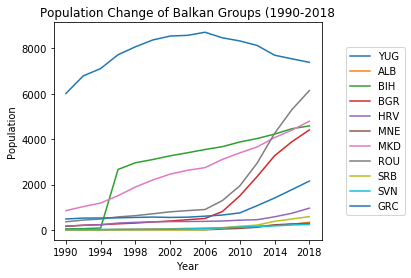

In [9]:
balkans = ['YUG.tif','ALB.tif','BIH.tif','BGR.tif', 'HRV.tif','MNE.tif','MKD.tif','ROU.tif','SRB.tif','SVN.tif','GRC.tif'] #'XXK.tif'
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lines = [] 
for country in balkans:
    countryAbbr = country.split(".",-1)[0]
    print(countryAbbr)
    lines = df_names_new[country].plot(kind='line', x='Year', y='Population',ax=ax,label="{}".format(countryAbbr),  ylabel='Population', title='Population Change of Balkan Groups (1990-2018')
    
plt.legend(bbox_to_anchor=(1.20,0.5), loc='center', borderaxespad=0.)
plt.savefig(image_path + '/PopChangeBalkan.png', dpi=300)
plt.show()


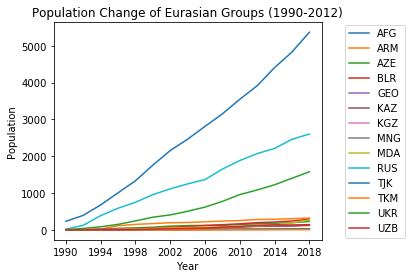

In [10]:
eurasia= ['AFG.tif','ARM.tif','AZE.tif','BLR.tif', 'GEO.tif','KAZ.tif','KGZ.tif','MNG.tif','MDA.tif','RUS.tif','TJK.tif','TKM.tif','UKR.tif', 'UZB.tif'] 
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lines = [] 
for i in eurasia:
    countryAbbr = i.split(".",-1)[0]
    lines = df_names_new[i].plot(kind='line', x='Year', y='Population',ax=ax,label="{}".format(countryAbbr),  ylabel='Population', title='Population Change of Eurasian Groups (1990-2012)')
    
plt.legend(bbox_to_anchor=(1.20,0.5), loc='center')
plt.savefig(image_path + '/PopChangeEurasia.png', dpi=300)
plt.show()